In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


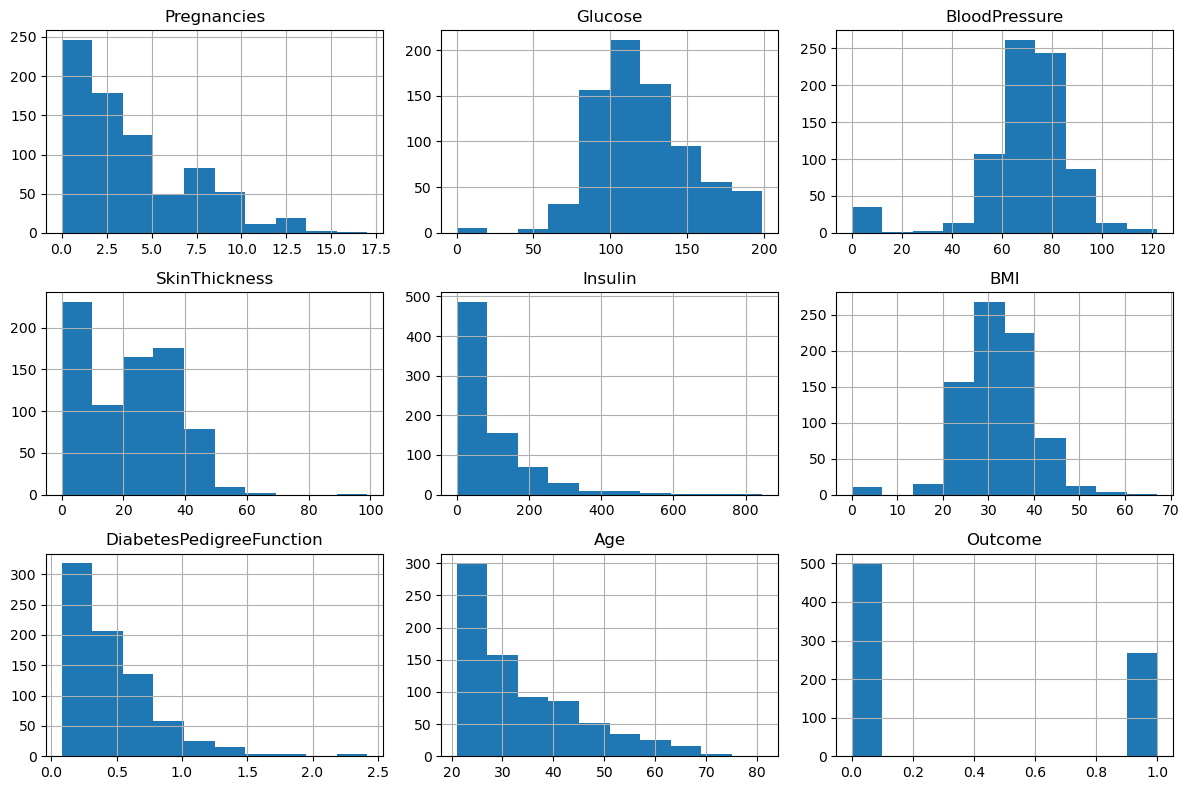

In [5]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

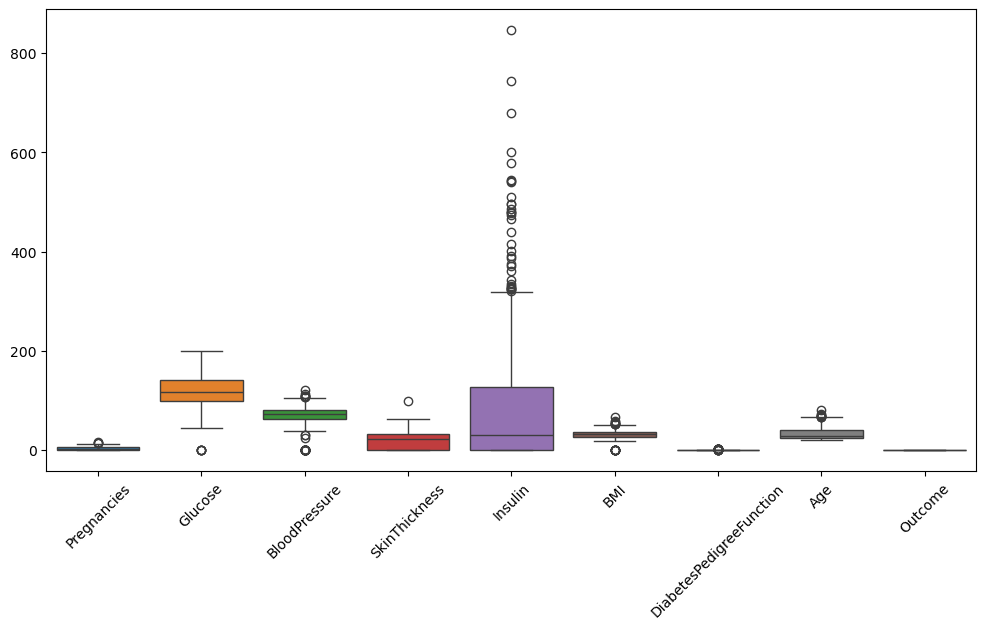

In [6]:
#Boxplot (Detect Outliers)

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

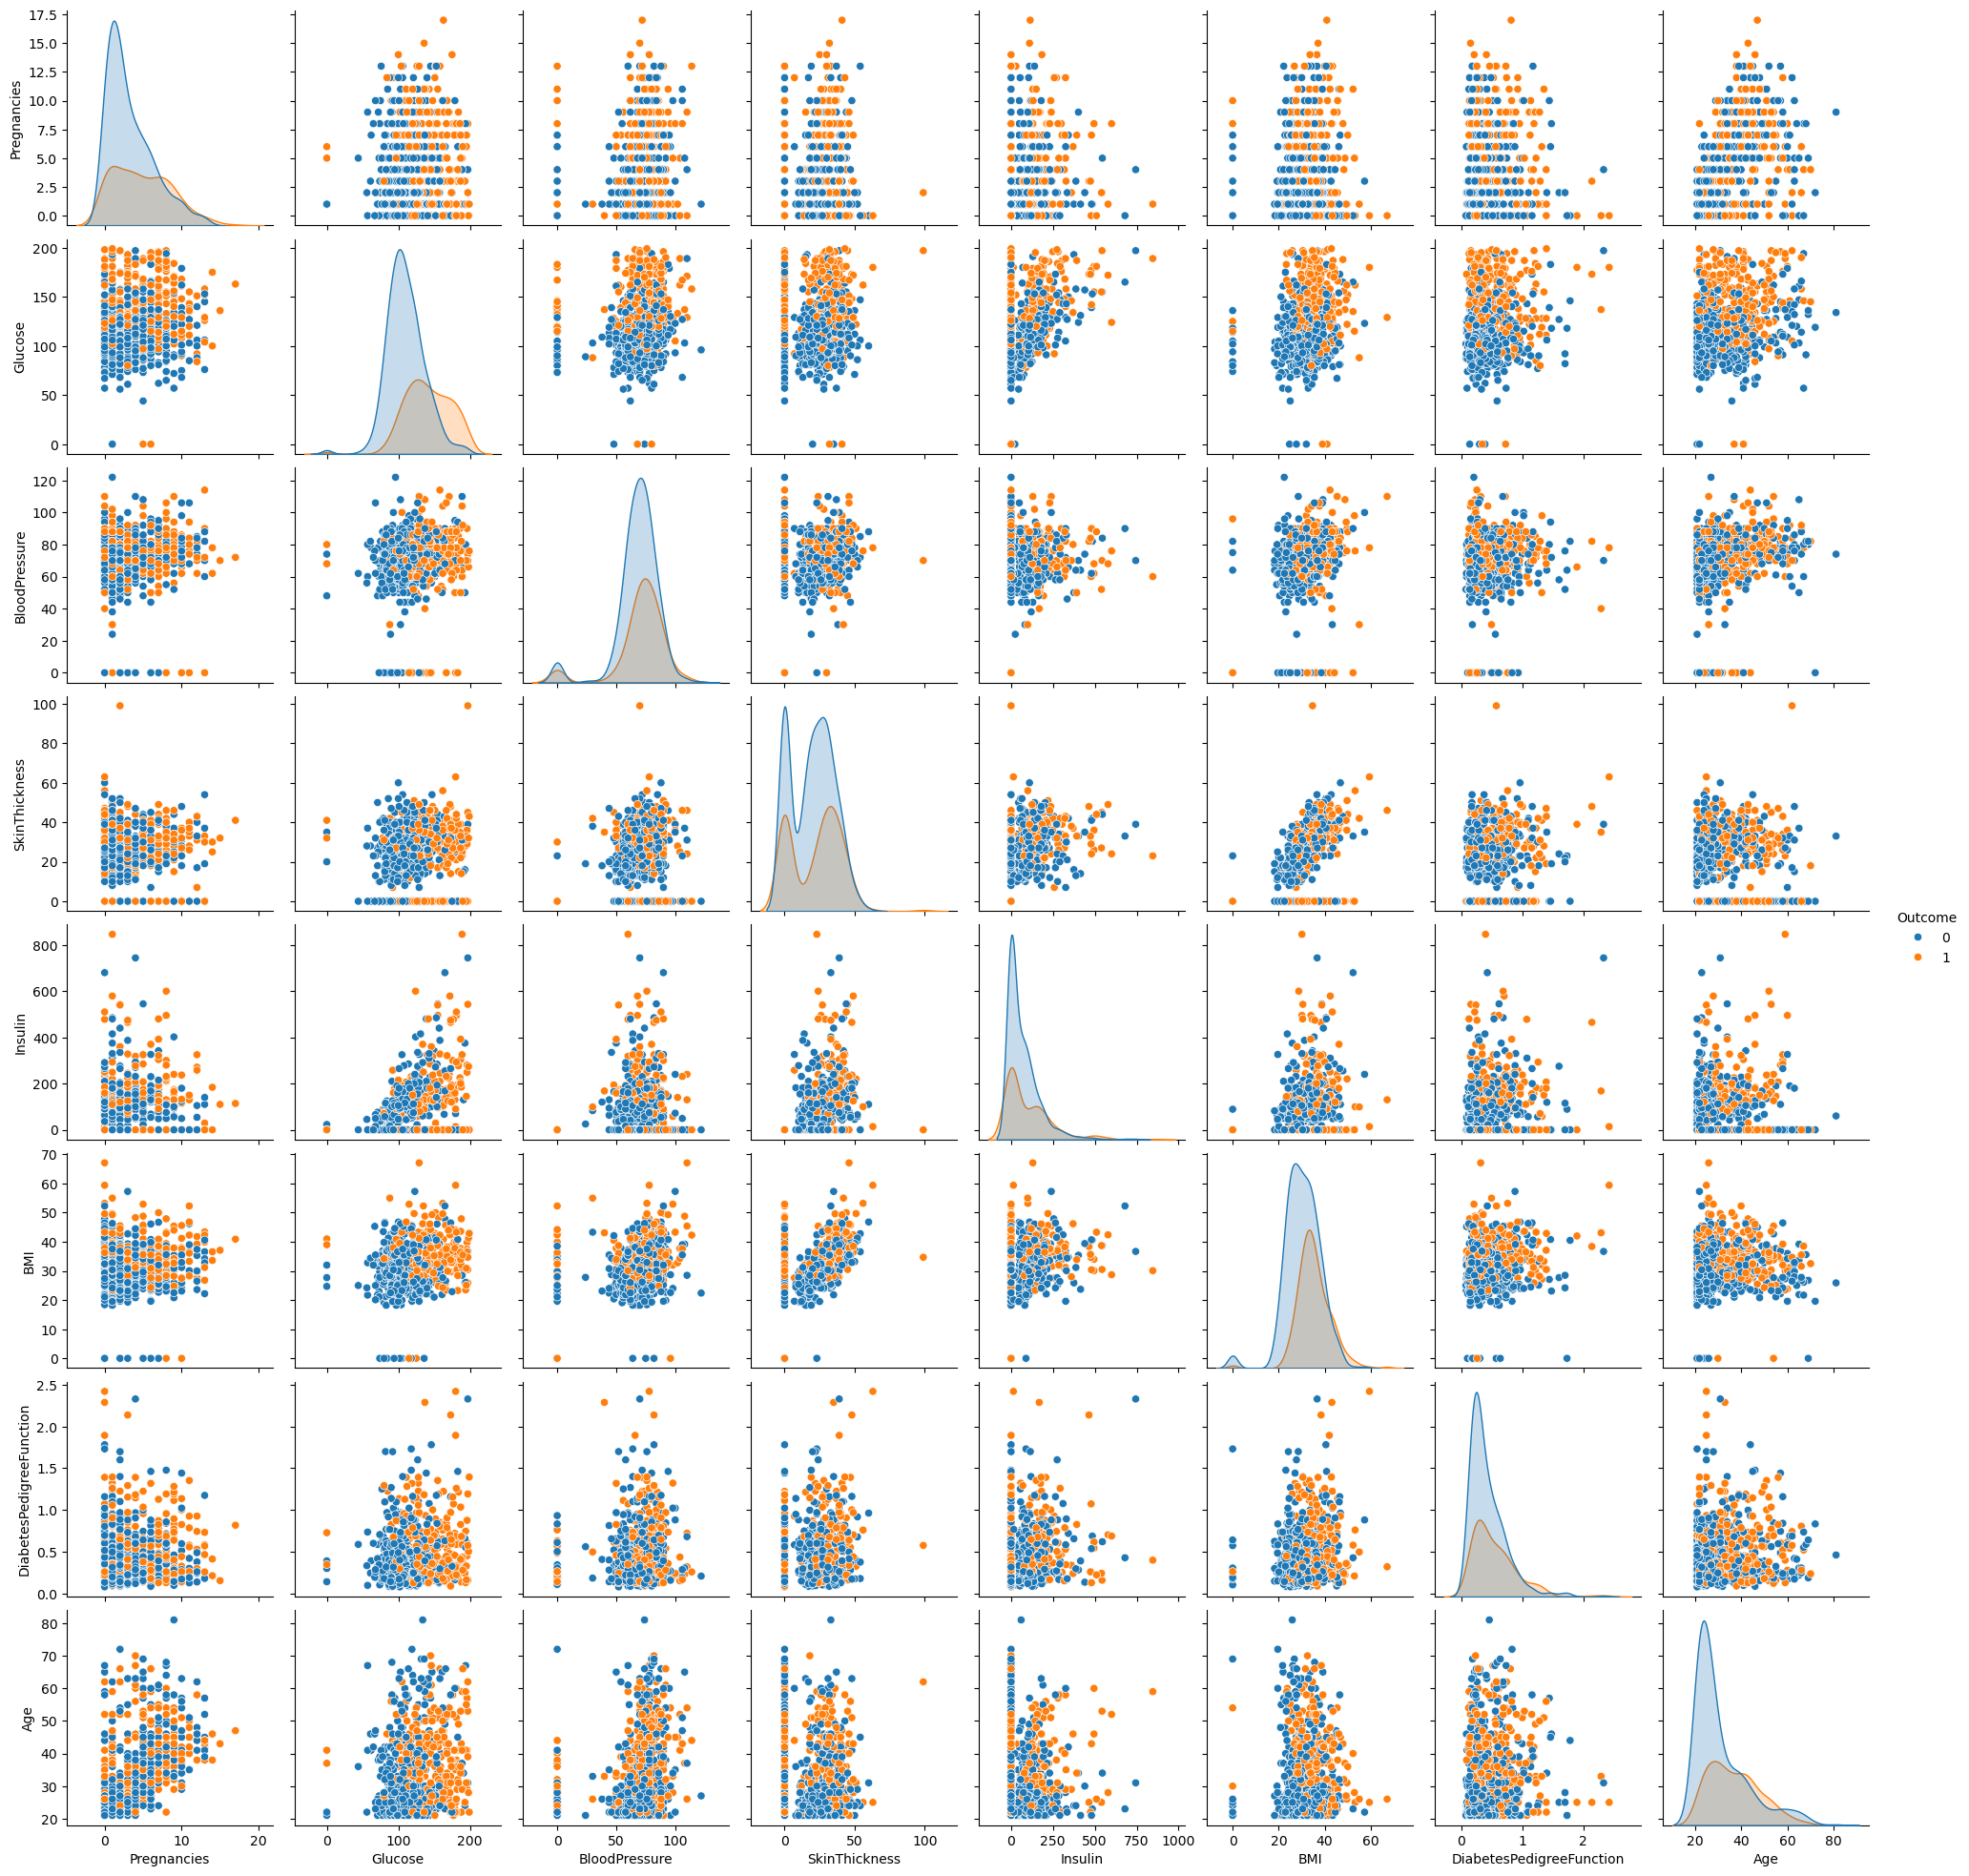

In [7]:
sns.pairplot(df, hue="Outcome")
plt.show()

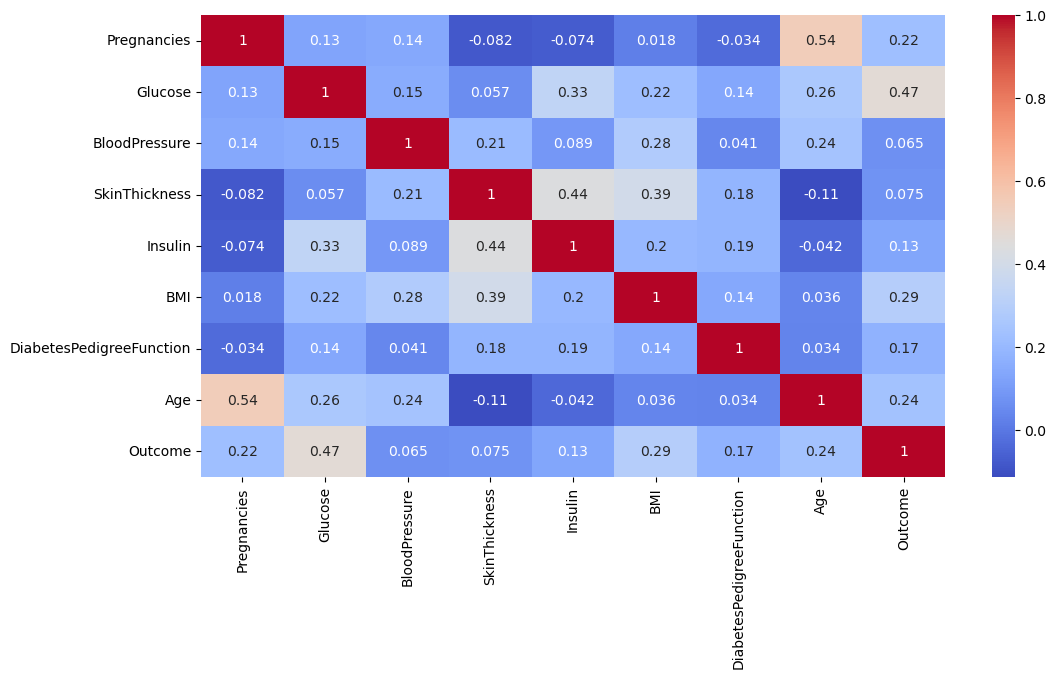

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

Glucose strongly correlates with Outcome.

BMI and Age show moderate correlation.

Higher Glucose → Higher Diabetes probability.

Some extreme outliers exist in Insulin.

In [9]:
#Data Preprocessing

cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols:
    df[col]= df[col].replace(0,np.nan)
    df[col].fillna(df[col].median(), inplace=True)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
#Feature & Target Split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [12]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
#Feature Scaling

scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-0.52639686, -1.25688146, -0.01899526, ..., -0.00745016,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32605067,  0.8081742 , ..., -0.59909194,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57153617, -2.16963585, ..., -0.52694051,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69173419,  1.13904198, ...,  1.91177805,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.63802409, -0.01899526, ...,  1.45000885,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10612077,  1.96621144, ..., -1.42161832,
        -0.61552223, -1.03594038]], shape=(614, 8))

In [16]:
X_test

array([[ 0.68185612, -0.79146606, -1.1770325 , ...,  0.23786472,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.32605067,  0.22915558, ...,  0.4831796 ,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.45902649, -0.68073083, ..., -0.22390447,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.89119794, -0.01899526, ...,  0.64191276,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.80424387, -0.18442915, ..., -0.62795252,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.58932103, -0.18442915, ...,  0.42545845,
         0.70068816,  0.53008521]], shape=(154, 8))

In [17]:
# Model Building
from sklearn.linear_model import LogisticRegression

In [18]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [20]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [21]:
#Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
ROC-AUC: 0.82277318640955


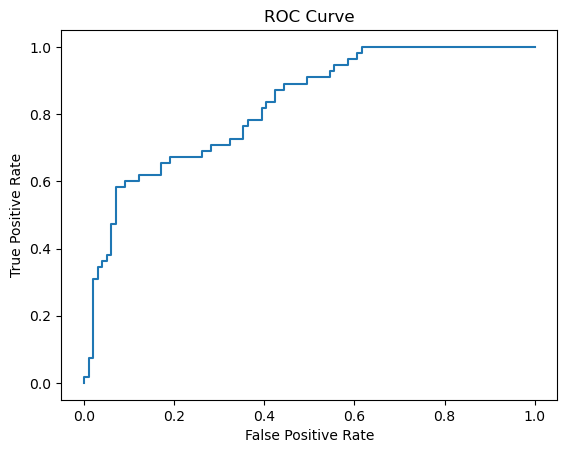

In [22]:
#Visualize the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [23]:
coefficients = pd.DataFrame({
    'Feature': df.drop("Outcome",axis=1).columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)

                    Feature  Coefficient
0               Pregnancies     0.222978
1                   Glucose     1.102682
2             BloodPressure    -0.151540
3             SkinThickness     0.068836
4                   Insulin    -0.138252
5                       BMI     0.688839
6  DiabetesPedigreeFunction     0.203635
7                       Age     0.392410


1. What is the difference between precision and recall?
precision : 
Out of all predicted positive cases, how many were actually positive
Focuses on False Positives (FP)
High precision → Few false alarms
recall :
Out of all actual positive cases, how many did we correctly detect
Focuses on False Negatives (FN)
High recall → Misses fewer real positives

Precision measures how accurate positive predictions are, while recall measures how well the model identifies all actual positive cases.